In [64]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
import regex as re
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/tests_path/figaro-code"
exp_names = ["mkl", "figaro_lapack"]
exp_paths = {"figaro_lapack": "logs/figaro/svd/lapack/thread48", "mkl": "logs/decomp_alg/jacobi/col_major/u_and_s_and_v"}
figaro_impls = ["figaro_lapack"]
figaro_impls_full_name = {"figaro_lapack": "C++-figaro_lapack"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
join_orders = {"DBRetailer": "LocationRoot", "DBFavorita": "StoresRoot", "DBYelp": "BusinessRoot"}
start_per = 10
end_per = 100
per_inc = 10

txt_name = "log.txt"
numeric_const_pattern = r"##Orthogonality of R####([+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
rx = re.compile(numeric_const_pattern)

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    accur_path = os.path.join(path_src, exp_path)

    df_measurement = pd.DataFrame(columns=db_names)
    for db_name in db_names:
        join_order = join_orders[db_name]

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_txt = os.path.join(accur_path, db_name_per, join_order, "log.txt")
            #relative_error = 1
            with open(path_txt, 'r') as file_accur:
                for line in file_accur:
                    #print(line)
                    match = rx.search(line)
                    if match:
                        relative_error = float(match.group(1))

            df_measurement.at[percent, db_name] = relative_error
            
        #out_workbook.save(gather_times_path)
            
        
        #print(df_measurement)
        df_measurement_exps[exp_name] = df_measurement.transpose()
        df_measurement.to_csv(exp_name + ".csv", sep="\t")
print(df_measurement_exps)





{'mkl':                     10           20           30           40           50   \
DBRetailer  2.97144e-13   3.3432e-13  3.83568e-13  4.42169e-13  4.39209e-13   
DBFavorita   6.2141e-13   1.5467e-12  1.46725e-12  2.70339e-12  2.42678e-12   
DBYelp      4.25477e-14  2.09549e-14  1.43891e-13  1.16351e-13  1.59096e-13   

                    60           70           80           90           100  
DBRetailer  4.77733e-13  4.85723e-13  6.23753e-13  8.88818e-13   5.4906e-13  
DBFavorita  7.00115e-12  2.71555e-12  2.03773e-12  2.69783e-12  4.22868e-12  
DBYelp       7.8202e-14  1.68611e-13  1.96813e-13  3.88546e-13  1.17023e-13  , 'figaro_lapack':                     10           20           30           40           50   \
DBRetailer  2.83811e-11  1.60434e-11   2.5559e-11  1.23884e-11  1.02499e-11   
DBFavorita  8.03562e-13  4.89301e-13  6.75283e-13   6.7719e-13  7.42535e-13   
DBYelp      6.69362e-08  3.15129e-08  6.63393e-08  3.66203e-08  6.09299e-08   

                    60      

{'mkl':                     10           20           30           40           50   \
DBRetailer  2.97144e-13   3.3432e-13  3.83568e-13  4.42169e-13  4.39209e-13   
DBFavorita   6.2141e-13   1.5467e-12  1.46725e-12  2.70339e-12  2.42678e-12   
DBYelp      4.25477e-14  2.09549e-14  1.43891e-13  1.16351e-13  1.59096e-13   

                    60           70           80           90           100  
DBRetailer  4.77733e-13  4.85723e-13  6.23753e-13  8.88818e-13   5.4906e-13  
DBFavorita  7.00115e-12  2.71555e-12  2.03773e-12  2.69783e-12  4.22868e-12  
DBYelp       7.8202e-14  1.68611e-13  1.96813e-13  3.88546e-13  1.17023e-13  , 'figaro_lapack':                     10           20           30           40           50   \
DBRetailer  2.83811e-11  1.60434e-11   2.5559e-11  1.23884e-11  1.02499e-11   
DBFavorita  8.03562e-13  4.89301e-13  6.75283e-13   6.7719e-13  7.42535e-13   
DBYelp      6.69362e-08  3.15129e-08  6.63393e-08  3.66203e-08  6.09299e-08   

                    60      

KeyError: ('mkl', 'figaro_lapack')

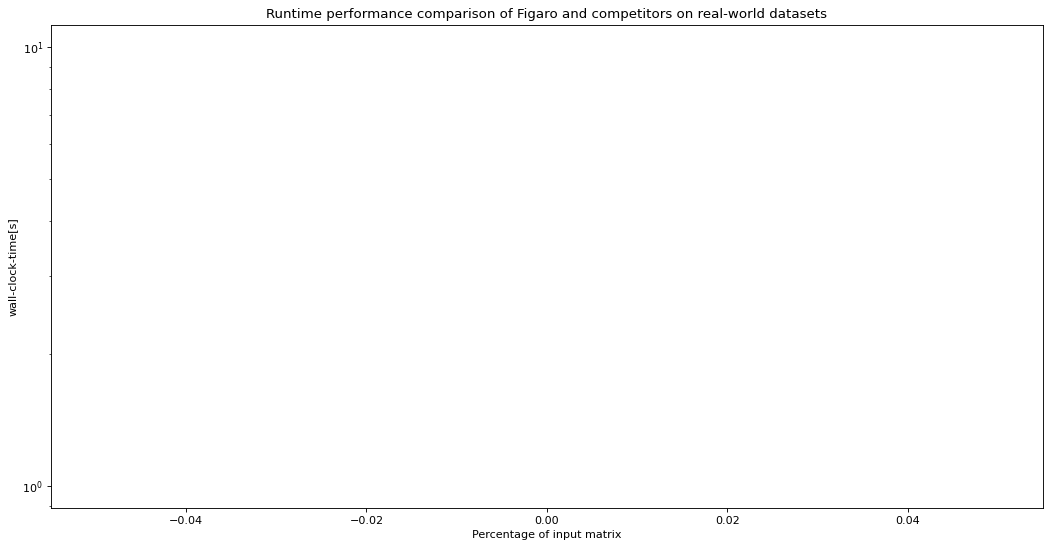

In [65]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=10)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro_thin_diag": "r", "figaro_lapack": "g", "mkl": "b"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    for figaro_impl in figaro_impls:
        df_measurement = df_measurement_exps[(exp_name, figaro_impl)]
        for db_name in df_measurement:
            print(df_measurement[db_name])
            plt.plot(df_measurement[db_name], "-" + exp_colour[figaro_impl] + db_marker[db_name], label="{} {} {}".format(exp_name, figaro_impl, db_name))
plt.legend(loc="upper left")

plt.show()